In [1]:
# a.

import numpy as np

def f(x):
    return (x**3 - (0.3 * x**2) - (8.56 * x) + 8.448)

a = 0
b = 2 * np.pi

n = 20
width = (b - a) / (n - 1)

x = np.linspace(a, b, n)
y = f(x)

# Riemann Integral
# (i) Left Riemann Integral
left_riemann = np.round((width * sum(y[:(n - 1)])), 4)
print(f'Left Riemann Integral = {left_riemann}')

# (ii) Right Riemann Integral
right_riemann = np.round((width * sum(y[1:])), 4)
print(f'Right Riemann Integral = {right_riemann}')

# (iii) Midpoint Rule
x_mid = (x[:(n - 1)] + x[1:]) / 2
y_mid = f(x_mid)

mid_rule = np.round((width * sum(y_mid)), 4)
print(f'Midpoint Rule = {mid_rule}')

# Trapezoid Rule
trapezoid = np.round(((width / 2) * (y[0] + (2 * sum(y[1:(n - 1)])) + y[n - 1])), 4)
print(f'Trapezoid Rule = {trapezoid}')

# Simpson's Rule
width_simspon = (b - a) / n

x_simpson = np.linspace(a, b, (n + 1))
y_simpson = f(x_simpson)

simpson = np.round(((width_simspon / 3) * (y_simpson[0] + (2 * sum(y_simpson[2:(n - 1):2])) + (4 * sum(y_simpson[1:n:2])) + y_simpson[n])), 4)
print(f'Simpson\'s Rule = {simpson}')

Left Riemann Integral = 219.826
Right Riemann Integral = 280.1521
Midpoint Rule = 248.4216
Trapezoid Rule = 249.989
Simpson's Rule = 248.9441


f'(0) = -8.4059
f''(0) = -1.6421


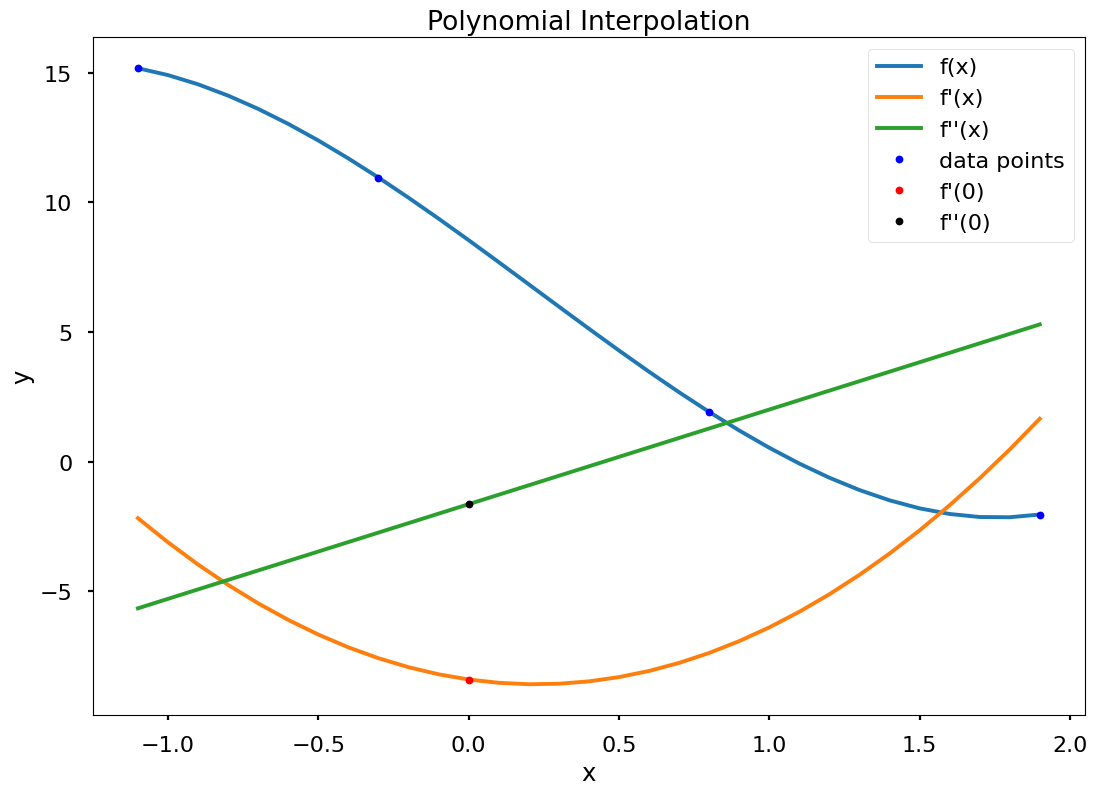

In [2]:
# c.

import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline

def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:,0] = y
    
    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])
    
    return coef

def newton_poly(coef, x_data, x):
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, (n + 1)):
        p = coef[n - k] + ((x - x_data[n - k]) * p)
    return p

x = np.array([-1.1, -0.3, 0.8, 1.9])
y = np.array([15.180, 10.962, 1.920, -2.040])
a_s = divided_diff(x, y)[0, :]

x_new = np.arange(x[0], (x[len(x) - 1] + .1), .1)
y_new = newton_poly(a_s, x, x_new)

def f_1_poly(x):
    return (-8.40585526231578947381 - (2 * 0.82105263157894736882 * x) + (3 * 1.2171052631578947368 * x**2))

def f_2_poly(x):
    return (-(2 * 0.82105263157894736882) + (3 * 1.2171052631578947368 * x))

f_1_poly_0 = np.round(f_1_poly(0), 4)
print(f"f'(0) = {f_1_poly_0}")

f_2_poly_0 = np.round(f_2_poly(0), 4)
print(f"f''(0) = {f_2_poly_0}")

plt.plot(x_new, y_new, label='f(x)')
plt.plot(x_new, f_1_poly(x_new), label="f'(x)")
plt.plot(x_new, f_2_poly(x_new), label="f''(x)")
plt.plot(x, y, 'b.', label='data points')
plt.plot(0, f_1_poly_0, 'r.', label="f'(0)")
plt.plot(0, f_2_poly_0, 'k.', label="f''(0)")
plt.title('Polynomial Interpolation')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

Error f'(0) = 0.1541
Error f''(0) = 1.0421


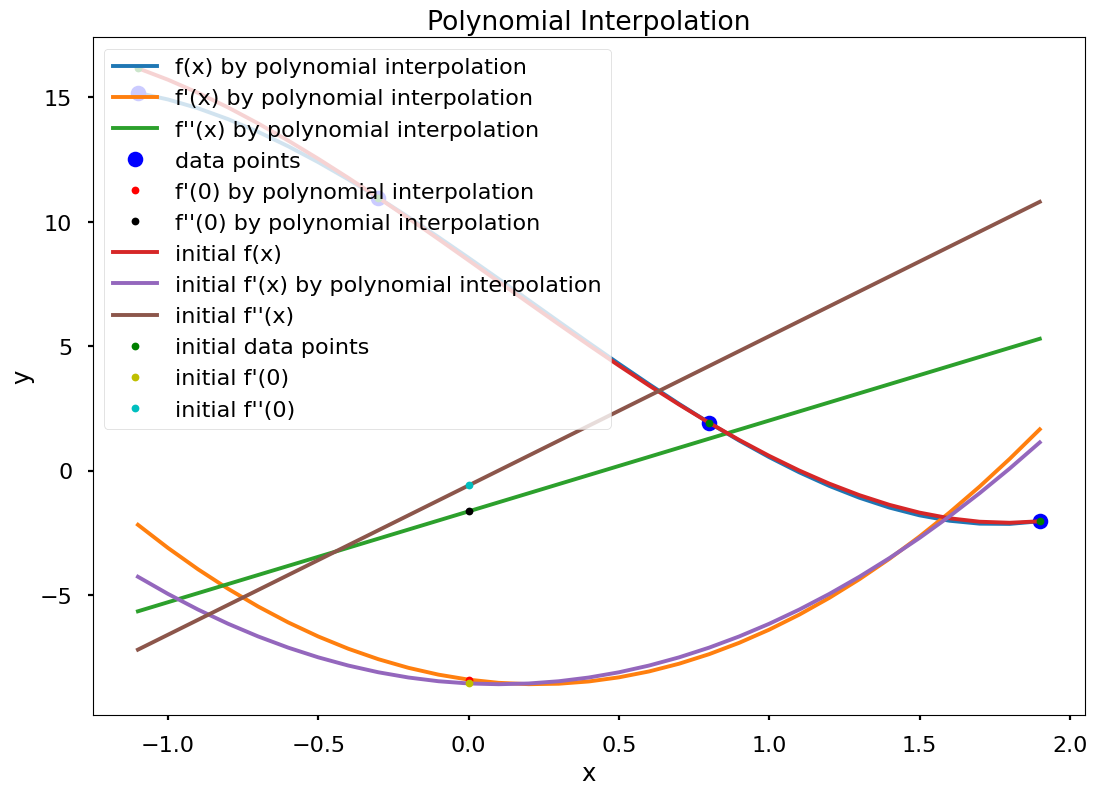

In [3]:
# d.

def f_1(x):
    return ((3 * x**2) - (2 * 0.3 * x) - 8.56)

def f_2(x):
    return ((2 * (3 * x)) - (2 * 0.3))

exact_f_1 = f_1(0)
error_f_1 = np.round(np.abs(exact_f_1 - f_1_poly_0), 4)
print(f"Error f'(0) = {error_f_1}")

exact_f_2 = f_2(0)
error_f_2 = np.round(np.abs(exact_f_2 - f_2_poly_0), 4)
print(f"Error f''(0) = {error_f_2}")

plt.plot(x_new, y_new, label='f(x) by polynomial interpolation')
plt.plot(x_new, f_1_poly(x_new), label="f'(x) by polynomial interpolation")
plt.plot(x_new, f_2_poly(x_new), label="f''(x) by polynomial interpolation")
plt.plot(x, y, 'bo', label='data points')
plt.plot(0, f_1_poly_0, 'r.', label="f'(0) by polynomial interpolation")
plt.plot(0, f_2_poly_0, 'k.', label="f''(0) by polynomial interpolation")
plt.plot(x_new, f(x_new), label='initial f(x)')
plt.plot(x_new, f_1(x_new), label="initial f'(x) by polynomial interpolation")
plt.plot(x_new, f_2(x_new), label="initial f''(x)")
plt.plot(x, f(x), 'g.', label='initial data points')
plt.plot(0, exact_f_1, 'y.', label="initial f'(0)")
plt.plot(0, exact_f_2, 'c.', label="initial f''(0)")
plt.title('Polynomial Interpolation')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()